In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
Metric Used: R2, Test Score: 0.46247327009049166
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    FunctionTransformer,
    KBinsDiscretizer
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
import shap

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

1. I pick the regression problem to predict the reviews per month for listings.
2. The dataset includes various information on Airbnb listings such as their location (borough, neighbourhood, and coordinates), price, room types, reviews, price and availability. These factors influence the popularity of a listing and its proxy, `reviews_per_month`, our feature of interest. As such, studying these features will be helpful in understanding trends that influence listing popularity.

In [3]:
listings = pd.read_csv('AB_NYC_2019.csv')
listings = pd.DataFrame(listings)
listings.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(listings, random_state=123, test_size=0.3)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

1. See below
2. See below
3. While all observations seem to have some association with our response variable, many class imbalances are present in different features of the dataset. This could lead to bias in our model and poor generalizable performance especially for the minority class. There is also missing data in `reviews_per_month`, `last_review`, `host_name`, and `name`. There are also inconsistent scales between most numeric features. In addition, most variables are numerical. We will hence have to drop the rows containing NAs in the target since we cannot impute the target.
4. From our quantile calculation of the response variable value we can see that most values are under 1, that is, close to 0. As such, it is inappropriate to use MAPE as it might give misleading figures when the actual values are small. In addition, as our response variable has large outliers (train_df['reviews_per_month']max = 58.5) and RMSE is sensitive to such outliers, it would be more appropriate to use R_2 error since it gives a more reliable indication of the model ability to account for variance.

In [5]:
train_df['price'].mean()

np.float64(151.528399462397)

This indicates that the average price of a listing is $150.

In [6]:
train_df['number_of_reviews'].mean()

np.float64(23.244813884181617)

This indicates that on average a listing has 23.2 reviews.

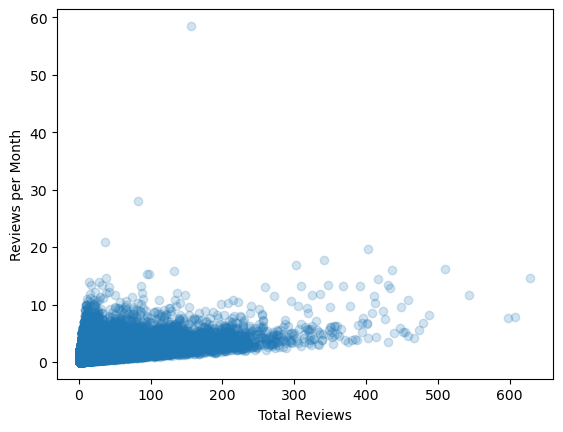

In [7]:
plt.scatter(x=train_df['number_of_reviews'], y=train_df['reviews_per_month'], alpha=0.2)
plt.xlabel('Total Reviews')
plt.ylabel('Reviews per Month')
plt.show()

The scatterplot shows that the the number of monthly reviews appears to be positively associated with the total number of reviews a listing has.

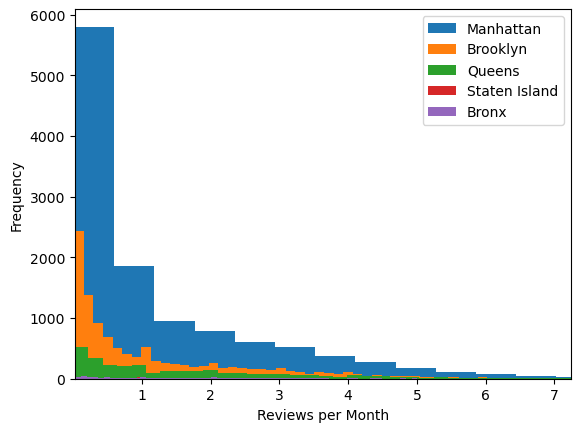

In [8]:
groups = train_df['neighbourhood_group'].unique()
for i in groups:
    train_df[train_df['neighbourhood_group']==i]['reviews_per_month'].plot.hist(label=i, bins=100)
    plt.xlabel('Reviews per Month')
    plt.legend()
    plt.xlim(train_df['reviews_per_month'].quantile(0.01),train_df['reviews_per_month'].quantile(0.99))
plt.show()    

The histogram shows that while all categories generally follow a right-skewed dsitribution, different neighbourhood groups have slightly different distributions. In addition, we can see that there is a class imbalance present in the number of examples per group.

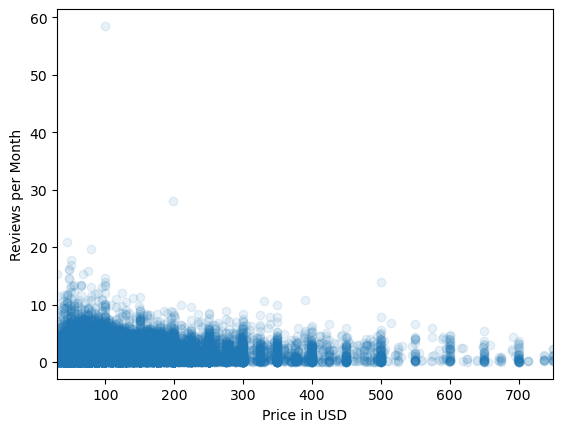

In [9]:
plt.scatter(x=train_df['price'], y=train_df['reviews_per_month'], alpha=0.1)
plt.xlabel('Price in USD')
plt.ylabel('Reviews per Month')
plt.xlim(train_df['price'].quantile(0.01), train_df['price'].quantile(0.99))
plt.show()

This scatterplot shows that the number of reviews per month appears to be negatively correlated with the price of a listing. This makes sense, as fewer guests would be willing to spend larger amounts of money to stay at an Airbnb.

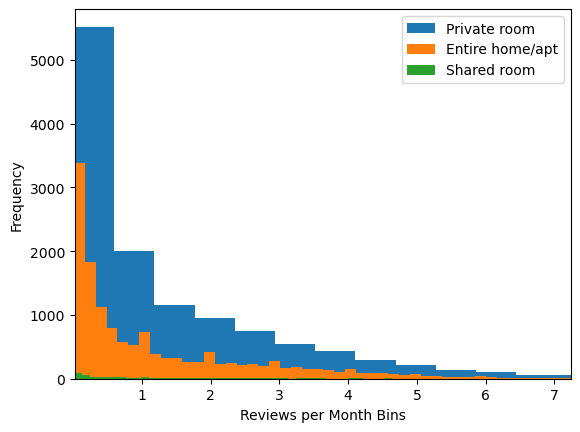

In [10]:
groups = train_df['room_type'].unique()
groups[0],groups[1] = groups[1],groups[0]
for i in groups:
    train_df[train_df['room_type']==i]['reviews_per_month'].plot.hist(label=i, bins=100)
    plt.xlabel('Reviews per Month Bins')
    plt.legend()
    plt.xlim(train_df['reviews_per_month'].quantile(0.01),train_df['reviews_per_month'].quantile(0.99))
plt.show()

The histogram shows that all room types have right-skewed distributions but they are different in respect to shape and tail widths. In addition, we see a large class imbalance with respect to the types of rooms, with barely any examples having the shared room type.

In [11]:
train_df['reviews_per_month'].quantile(0.59)

np.float64(1.0)

This indicates that approximately 60% of all examples observations have a response variable value less than or equal to 1. This is useful particularly if there exist outliers that inflate the mean.

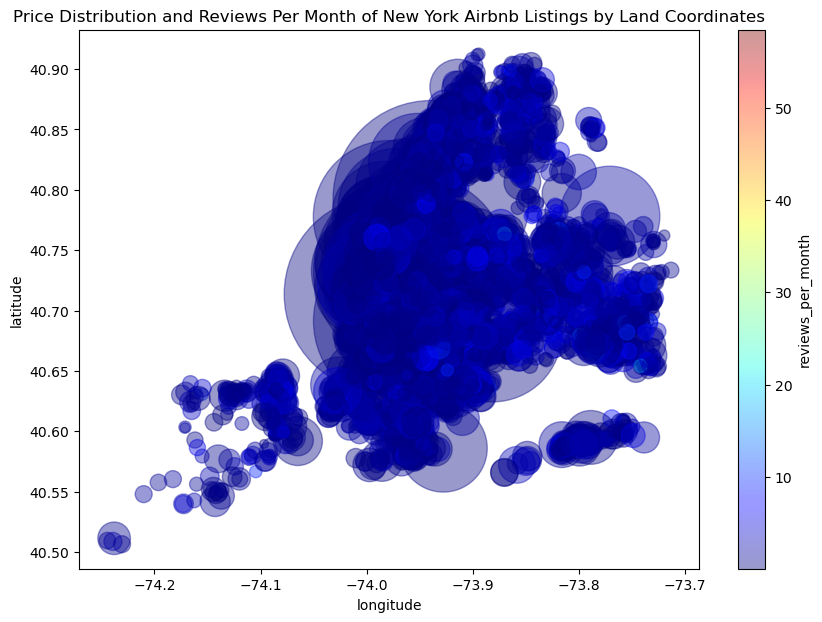

In [12]:
plcm = train_df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=train_df["price"]*2,
    figsize=(10, 7),
    c="reviews_per_month",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False,
);

plcm.set_title("Price Distribution and Reviews Per Month of New York Airbnb Listings by Land Coordinates")
plt.show()

The visualization shows that the highest-priced Airbnb listings are in central and northwestern New York, with prices decreasing as you move north and west. Lower-priced listings have a lighter color corresponding to more reviews per month.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

We can perform discretization of latitude and longitude to create bins instead.

By dividing `number_of_reviews` by `calculated_host_listings_count` we can extract a new feature called `reviews_per_listing`. We will do this in the column transformer.

In [13]:
train_df = train_df.assign(
    reviews_per_listing=train_df["number_of_reviews"] / train_df["calculated_host_listings_count"]
)
test_df = test_df.assign(
    reviews_per_listing=test_df["number_of_reviews"] / test_df["calculated_host_listings_count"]
)
train_df.head()

id                                             name    host_id  \
36150  28736148           Cozy 1 Bedroom Apt in Hamilton Heights   43431867   
45223  34613254  Amazing One Bedroom at the Time Square Area/72B   48146336   
14316  11144496                New Spacious Master, Williamsburg   48819868   
1691     766814                    Adorable Midtown West Studio!    4022922   
20195  16162621      NEW! Exceptional 2BR/1BA Williamsburg Oasis  104781467   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
36150     Tommy           Manhattan  Washington Heights  40.83256  -73.94440   
45223     Irina           Manhattan      Hell's Kitchen  40.76134  -73.99299   
14316      Nick            Brooklyn        Williamsburg  40.71119  -73.95097   
1691    Caitlin           Manhattan      Hell's Kitchen  40.75900  -73.99530   
20195   Russell            Brooklyn        Williamsburg  40.71306  -73.94856   

             room_type  price  minimum_nights  number_of_reviews last_review  \
36150  Entire home/apt     96               4                  0         NaN   
45223  Entire home/apt    150              30                  0         NaN   
14316     Private room    200               1                  0         NaN   
1691   Entire home/apt     95               1                  0         NaN   
20195  Entire home/apt    199               3                  1  2016-12-11   

       reviews_per_month  calculated_host_listings_count  availability_365  \
36150                NaN                               1                17   
45223                NaN                              20               332   
14316                NaN                               1                 0   
1691                 NaN                               1                 0   
20195               0.03                               1                 0   

       reviews_per_listing  
36150                  0.0  
45223                  0.0  
14316                  0.0  
1691                   0.0  
20195                  1.0

We can also add a feature by creating bins for `minimum_nights` to create meaningful intervals that can be used for prediction. We will do this later in the column transformer.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [14]:
drop_cols = ['id', 'host_id', 'host_name', 'last_review','name']
numeric_cols = ['price', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'reviews_per_listing']
discretized_cols = ['latitude','longitude']
discretized_cols2 = ['minimum_nights']
vector_cols=['name']
onehot_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

# adapted from: https://www.kaggle.com/code/mobasshir/machine-learning-issues-and-fixes
one_dim = FunctionTransformer(np.reshape, kw_args={'newshape':-1}) 

pipe = make_pipeline(SimpleImputer(strategy='constant'), one_dim, CountVectorizer(stop_words="english",max_features=10))
# Use this pipeline in your column transformer
transformer = make_column_transformer(
    (pipe, vector_cols),
    (KBinsDiscretizer(n_bins=20, encode="onehot"),discretized_cols),
    (KBinsDiscretizer(n_bins=3, encode="onehot"),discretized_cols2),
    (StandardScaler(), numeric_cols),
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols),
    ("drop", drop_cols))

We are dropping `id`,`host_id`, and `host_name` since the id and name of a previous host are not useful in predicting the popularity of other listings. In addition, we are dropping `last_review` since we do not yet know how to process dates.

In [15]:
# Cannot impute the target
train_df = train_df.dropna(subset = ['reviews_per_month'])
test_df = test_df.dropna(subset = ['reviews_per_month'])

In [16]:
# Reducing training set size since steps 9 and 10 take 20+ minutes for each model
train_df = train_df.sample(n=2000, replace=False)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [17]:
dummy = DummyRegressor(strategy="mean")

In [18]:
X_train = train_df.drop(columns=["reviews_per_month"])
y_train = train_df["reviews_per_month"]
X_test = test_df.drop(columns=["reviews_per_month"])
y_test = test_df["reviews_per_month"]

In [19]:
# Preprocessor not needed since dummy does not use input variables
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.0

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [20]:
first_linear_pipeline = make_pipeline(transformer, Ridge())

In [21]:
first_linear_res = pd.DataFrame(cross_validate(first_linear_pipeline, X_train, y_train))
print(first_linear_res.mean())
first_linear_res

fit_time      0.062782
score_time    0.026178
test_score    0.373732
dtype: float64


fit_time  score_time  test_score
0  0.064891    0.036087    0.253954
1  0.061486    0.015714    0.378873
2  0.062518    0.031720    0.380510
3  0.062501    0.016047    0.421955
4  0.062514    0.031323    0.433369

In [22]:
alpha_vals_large = np.logspace(-4, 4, 100)
param_grid = {"ridge__alpha":alpha_vals_large}
random_search_linear = RandomizedSearchCV(first_linear_pipeline,
                                          param_grid,
                                          n_jobs=-1,
                                          return_train_score=True)
random_search_linear.fit(X_train,y_train)
print(random_search_linear.best_score_)
print(random_search_linear.best_params_['ridge__alpha'])

0.4066020871014405
79.24828983539186


In [23]:
random_alpha = random_search_linear.best_params_['ridge__alpha'];
# If check below prevents negative values from being input as the alpha
if (random_alpha < 5):
    random_alpha = 5
param_grid_narrow = {"ridge__alpha":np.arange(random_alpha-5, random_alpha+5,2.5)}
grid_search_linear = GridSearchCV(first_linear_pipeline,
                                  param_grid_narrow,
                                  n_jobs=-1,
                                  return_train_score=True)
grid_search_linear.fit(X_train,y_train)
best_alpha = grid_search_linear.best_params_["ridge__alpha"]
print(grid_search_linear.best_score_,best_alpha)

0.4067691989884027 74.24828983539186


In [24]:
linear_tuned = make_pipeline(transformer, Ridge(alpha=best_alpha))
cv_results_linear = pd.DataFrame(cross_validate(linear_tuned, X_train, y_train, return_train_score = True))
ridge_sd = cv_results_linear['test_score'].std()
print(ridge_sd)
print(cv_results_linear.mean())
cv_results_linear

0.05298844013919663
fit_time       0.061995
score_time     0.016848
test_score     0.406769
train_score    0.443880
dtype: float64


fit_time  score_time  test_score  train_score
0  0.067458    0.015642    0.318263     0.468140
1  0.056339    0.006446    0.417398     0.443371
2  0.063401    0.015138    0.416812     0.440269
3  0.046874    0.031295    0.461699     0.432975
4  0.075905    0.015722    0.419674     0.434642

The linear model initially gives an mean cross-validation R2 score of 0.37. After tuning the alpha hyperparameter we get a model with alpha = ~74.25 and a mean cross-validation score of ~0.41. As such, there is an observable improvement in the mean score. Further, the small standard deviation value of 0.05 shows that the scores are generally consistent across folds.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [25]:
knn_pipe_first = make_pipeline(transformer, KNeighborsRegressor())
x1 = pd.DataFrame(cross_validate(knn_pipe_first, X_train, y_train, return_train_score = True))
print(x1)
print(x1.mean())

   fit_time  score_time  test_score  train_score
0  0.054062    0.284871    0.257699     0.546812
1  0.050102    0.032011    0.296209     0.539493
2  0.046884    0.033120    0.351382     0.547366
3  0.037175    0.047331    0.375484     0.548826
4  0.044782    0.046965    0.322375     0.572176
fit_time       0.046601
score_time     0.088860
test_score     0.320630
train_score    0.550935
dtype: float64


In [26]:
decision_tree_regular = make_pipeline(transformer, DecisionTreeRegressor())
x2 = pd.DataFrame(cross_validate(decision_tree_regular, X_train, y_train, return_train_score=True))
print(x2)
print(x2.mean())

   fit_time  score_time  test_score  train_score
0  0.097031    0.015626    0.147393          1.0
1  0.088405    0.015634    0.225886          1.0
2  0.093756    0.015615   -0.076939          1.0
3  0.093752    0.031253   -0.020082          1.0
4  0.078012    0.031238    0.137486          1.0
fit_time       0.090191
score_time     0.021873
test_score     0.082749
train_score    1.000000
dtype: float64


In [27]:
forest_pipeline = make_pipeline(transformer, RandomForestRegressor(n_jobs=-1))
x3 = pd.DataFrame(cross_validate(forest_pipeline, X_train, y_train, return_train_score=True))
print(x3)
print(x3.mean())

   fit_time  score_time  test_score  train_score
0  0.596687    0.074393    0.432886     0.938327
1  0.596918    0.082149    0.524065     0.930988
2  0.603303    0.075182    0.551523     0.933204
3  0.562782    0.059975    0.541804     0.932097
4  0.541677    0.065445    0.499822     0.927289
fit_time       0.580273
score_time     0.071429
test_score     0.510020
train_score    0.932381
dtype: float64


| **Model**                   | **Mean Training Score** | **Mean Cross-Val Score** | **Mean Score Time** |                                      
|-----------------------------|--------------------------|---------------------------|----------------------|
| **KNeighborsRegressor**     | 0.55                    | 0.32                      | 0.08                 |
| **DecisionTreeRegressor**   | 1.00                    | 0.08                      | 0.02                 |
| **RandomForestRegressor**   | 0.93                    | 0.51                      | 0.07                 |

From the table above, we can see that DecisionTreeRegressor has the highest overiftting with a training R2 score of 1 and a validation R2 score of only 0.08. In contrast, RandomForestregressor has a lower mean training score of 0.93 and a much higher mean validation score of 0.51. This suggests that this model might generalize better but the large gap still suggest that overfitting is occurring. On the other hand, KNeighborsRegressor seems to show underfitting with both low mean training and cross-validation scores.

Only RandomForestRegressor beats the linear model, but it does so by a significant margin.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [28]:
#Setting cv to 2 in rfecv in the interest of time (takes 10+ mins even with 2 folds)
rfe_knn_pipeline = make_pipeline(
    transformer,
    RFECV(RandomForestRegressor(n_jobs=-1), n_jobs=-1, cv=2),
    KNeighborsRegressor())
rfe_knn_res = pd.DataFrame(cross_validate(rfe_knn_pipeline, X_train, y_train, return_train_score=True))
print(rfe_knn_res)
print(rfe_knn_res.mean())

     fit_time  score_time  test_score  train_score
0  210.778316    0.053535    0.261354     0.564926
1  166.119870    0.050897    0.286956     0.546773
2  212.963956    0.040936    0.377878     0.601256
3  238.932022    0.045024    0.415175     0.569811
4  205.229174    0.031368    0.393888     0.597831
fit_time       206.804668
score_time       0.044352
test_score       0.347050
train_score      0.576119
dtype: float64


In [29]:
rfe_dtree_pipeline = make_pipeline(
    transformer,
    RFECV(DecisionTreeRegressor(), n_jobs=-1),
    DecisionTreeRegressor())
rfe_dtree_res = pd.DataFrame(cross_validate(rfe_dtree_pipeline, X_train, y_train, return_train_score=True))
print(rfe_dtree_res)
print(rfe_dtree_res.mean())    

    fit_time  score_time  test_score  train_score
0  12.202657    0.015632    0.101090     1.000000
1  15.406825    0.016828   -0.021628     0.523746
2  15.340677    0.015618    0.226981     0.524372
3  12.755322    0.015626    0.151651     0.505363
4  12.131724    0.015626    0.249928     0.482148
fit_time       13.567441
score_time      0.015866
test_score      0.141604
train_score     0.607126
dtype: float64


In [30]:
# Setting cv = 2 in the interest of time (takes 15+ minutes with cv=2)
rfe_forest_pipeline = make_pipeline(
    transformer,
    RFECV(RandomForestRegressor(n_jobs=-1),n_jobs=-1, cv=2),
    RandomForestRegressor(n_jobs=-1))
rfe_forest_res = pd.DataFrame(cross_validate(rfe_forest_pipeline, X_train, y_train, return_train_score=True))
print(rfe_forest_res)
print(rfe_forest_res.mean())

     fit_time  score_time  test_score  train_score
0  129.323299    0.075520    0.424532     0.937561
1  136.549193    0.070285    0.525885     0.931747
2  204.637739    0.076194    0.535672     0.930825
3  195.792348    0.070681    0.528762     0.932034
4  200.835507    0.073599    0.477448     0.934552
fit_time       173.427617
score_time       0.073256
test_score       0.498460
train_score      0.933344
dtype: float64


| **Model**                   | **RFECV Estimator** | **Mean Training Score** | **Mean Cross-Val Score** |  **Mean Score Time** |                                    
|-----------------------------|--------------------------|---------------------------|----------------------|------|
| **KNeighborsRegressor**     | RandomForestRegressor                    | 0.58                     | 0.35                 |   0.07      |
| **DecisionTreeRegressor**   | DecisionTreeRegressor                    | 0.61                      | 0.14                |   0.02       |
| **RandomForestRegressor**   | RandomForestRegressor                    | 0.93                      | 0.50                |   0.07       |


As we can see the only model which shows significant improvement with RFECV is DecisionTreeRegressor. KNeighborsRegressor with RFECV only shows a marginal improvement of ~0.03 in the mean cross-validation score hence there is no need to use this model particuarly since each fold also now takes more than 3 minutes to fit. In the case of RandomForestRegressor, the model without RFECV actually has a higher mean score too.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [31]:
n_neighbors_grid = 5 * np.arange(1,20,1)
param_grid_k = {"kneighborsregressor__n_neighbors":n_neighbors_grid}
random_search_knn = RandomizedSearchCV(knn_pipe_first,
                                          param_grid_k,
                                          n_jobs=-1,
                                          return_train_score=True)
random_search_knn.fit(X_train,y_train)
best_k_random = random_search_knn.best_params_['kneighborsregressor__n_neighbors']
print(best_k_random)
#Set k value to 11 if less than to prevent grid creation below from accepting vals less than 1
if (best_k_random < 11):
    best_k_random = 11
grid_search_knn = GridSearchCV(knn_pipe_first,
                               {"kneighborsregressor__n_neighbors":np.arange(best_k_random-10,best_k_random+10,1)},
                               n_jobs=-1,
                               return_train_score=True)
grid_search_knn.fit(X_train, y_train)
best_k_grid = grid_search_knn.best_params_['kneighborsregressor__n_neighbors']
print(grid_search_knn.best_score_, best_k_grid)

30
0.37346033780951154 31


In [32]:
mdepth_tune_grid = np.arange(1,10,1)
param_grid_mdepth = {"decisiontreeregressor__max_depth":mdepth_tune_grid}
random_search_mtree = GridSearchCV(rfe_dtree_pipeline,
                                         param_grid_mdepth,
                                         n_jobs=-1,
                                         return_train_score=True)
random_search_mtree.fit(X_train, y_train)
best_mdepth = random_search_mtree.best_params_['decisiontreeregressor__max_depth']
print(random_search_mtree.best_score_, best_mdepth)

0.2957115529723549 2


In [33]:
rforest_param_grid = {"randomforestregressor__n_estimators": 5 * np.arange(10, 30, 1),
                      "randomforestregressor__max_depth": 5 * np.arange(1,10)}
grid_search_broad = GridSearchCV(forest_pipeline,
                                 rforest_param_grid,
                                 n_jobs=-1,
                                 return_train_score=True)
grid_search_broad.fit(X_train, y_train)
best_nestim_broad = grid_search_broad.best_params_['randomforestregressor__n_estimators']
best_md_broad = grid_search_broad.best_params_['randomforestregressor__max_depth']
if (best_nestim_broad < 5):
    best_nestim_broad = 5
if (best_md_broad < 5):
    best_md_broad = 5
grid_search_narrow = GridSearchCV(forest_pipeline,
                                  {"randomforestregressor__n_estimators": np.arange(best_nestim_broad-4, best_nestim_broad+4,1),
                                   "randomforestregressor__max_depth": np.arange(best_md_broad-4, best_md_broad+4,1)},
                                  n_jobs=-1,
                                  return_train_score=True)
grid_search_narrow.fit(X_train, y_train)
best_nestim = grid_search_narrow.best_params_['randomforestregressor__n_estimators']
best_md = grid_search_narrow.best_params_['randomforestregressor__max_depth']
print(grid_search_narrow.best_score_, best_nestim, best_md)

0.5130673513326516 105 33


| **Model**                   | **Tuned Hyperparameter Value**            | **R2 Accuracy Score** |
|----------------------------|-----------------------------------------------------------------------------|-----------|
| **KNeighborsRegressor**            | n_neighbors: 31 | ~0.37 |
| **DecisionTreeRegressor with RFECV** | max_depth: 2 | ~0.30 |
| **RandomForestRegressor** | n_estimators: 105, max_depth: 33 | ~0.51 |

Of the models tuned, DecisionTreeRegressor achieves the highest relative increase in R2 score, achieving a mean cross-val score of approx. 0.30 with a tree of max depth 2. However, its performance still remains low compared to the other models.
On the other hand, the score of RandomForestRegressor is still the highest but is about the same before and after tuning to 105 estimators and a max depth of 33. KNeighborsRegressor achieves a marginal gain of ~0.05 with the number of neighbors tuned to 31 in mean cross-val scores.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [34]:
rforest_tuned_pipeline = make_pipeline(transformer,
                                       RandomForestRegressor(n_estimators=best_nestim, max_depth=best_md, n_jobs=-1))
tuned_rf_results = pd.DataFrame(cross_validate(rforest_tuned_pipeline, X_train, y_train, return_train_score=True))
print(tuned_rf_results.mean())
tuned_rf_results

fit_time       0.604574
score_time     0.082743
test_score     0.508949
train_score    0.933032
dtype: float64


fit_time  score_time  test_score  train_score
0  0.566389    0.070656    0.435701     0.932138
1  0.606201    0.084106    0.524278     0.933110
2  0.611740    0.089264    0.547460     0.933143
3  0.642110    0.079889    0.552193     0.934090
4  0.596430    0.089799    0.485111     0.932677

In [37]:
rforest_tuned_pipeline.fit(X_train, y_train)
vectorized_cnames = list(rforest_tuned_pipeline.named_steps["columntransformer"].named_transformers_['pipeline'].named_steps['countvectorizer'].get_feature_names_out())
kbins1 = list(rforest_tuned_pipeline.named_steps["columntransformer"].named_transformers_['kbinsdiscretizer-1'].get_feature_names_out())

kbins2 = list(rforest_tuned_pipeline.named_steps["columntransformer"].named_transformers_['kbinsdiscretizer-2'].get_feature_names_out())
ohe_names = list(rforest_tuned_pipeline.named_steps["columntransformer"].named_transformers_['onehotencoder'].get_feature_names_out(onehot_cols))
feature_names_full = (
    vectorized_cnames + kbins1 + kbins2 + numeric_cols + ohe_names
)
feature_names_full
data = {
    "Importance": rforest_tuned_pipeline.named_steps["randomforestregressor"].feature_importances_,
}
imp_df = pd.DataFrame(
    data=data,
    index=feature_names_full,
).sort_values(by="Importance", ascending=False)
imp_df.head(12)

Importance
number_of_reviews                    0.383747
availability_365                     0.118121
minimum_nights_2.0                   0.050573
reviews_per_listing                  0.040858
price                                0.037626
neighbourhood_Springfield Gardens    0.034934
minimum_nights_0.0                   0.032254
neighbourhood_East Elmhurst          0.031371
bedroom                              0.012919
latitude_15.0                        0.012410
apartment                            0.011058
calculated_host_listings_count       0.009524

As we can see from the list of features organized by importance with respect to the best model out of the ones selected, the feature `number_of_reviews` dominates all others by a large margin. The second most important feature, `availability_365` has an importance score ~1/4th that of `number_of_reviews`.

The importance of `number_of_reviews` also makes intuitive sense, since the more reviews a listing has, the more likely it is that more people are staying there and hence affecting the reviews per month.

Most features only have a minimal impact on the response variable, with the importance of the twelfth most important feature already less than 0.01.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [38]:
rforest_tuned_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function reshape at 0x0000017960FCBB30>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('countvectorizer',
                                                                   CountVectorizer(max_features=10,
                                                                                   stop_words='english'))]),
                                                  ['name']),
                                                 ('...
                                                   'availability_365',
                                                   'reviews_per_listing']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['neighbourhood_group',
                                                   'neighbourhood',
                                                   'room_type']),
                                                 ('drop', 'drop',
                                                  ['id', 'host_id', 'host_name',
                                                   'last_review', 'name'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=np.int64(33),
                                       n_estimators=np.int64(105),
                                       n_jobs=-1))])

In [39]:
rforest_tuned_pipeline.score(X_test, y_test)

0.46247327009049166

We have obtained a R2 score ~0.46, which is close to the mean cross-validation score of 0.51 using the tuned model (seen in Section 11 above). Although the test score is lower than the cross-validation score, this gap is minor which suggests that the model is performing consistently on both the validation and test datasets. This indicates that our model generalizes well to unseen data. </b>

It also seems that there is not much optimization bias since the validation score of the grid search (0.51) is not much lower than the test score, which indicates that we do not have significant overfitting. 

In [40]:
idx1 = 3468
idx2 = 8767

In [41]:
X_test_enc = pd.DataFrame(
    data = transformer.transform(X_test),
    columns=feature_names_full,
    index=X_test.index,
)

In [42]:
explainer = shap.TreeExplainer(rforest_tuned_pipeline.named_steps['randomforestregressor'])
test_shap_values = explainer(X_test_enc)
test_shap_values

.values =
array([[-2.03756330e-02,  9.70957776e-03, -1.37066801e-02, ...,
        -2.03346846e-02,  1.33787703e-04,  2.19710773e-04],
       [-6.61716672e-03, -1.36030906e-03,  3.81182539e-02, ...,
        -3.23622197e-03, -1.18176099e-03,  1.60923699e-05],
       [-5.70024282e-02,  8.44141776e-03, -2.14596113e-02, ...,
        -1.23574167e-02,  9.91109744e-03,  2.73368065e-04],
       ...,
       [-4.64012528e-03, -9.22152347e-04, -6.94715052e-03, ...,
        -5.14825113e-03, -9.55339115e-04, -2.95260758e-05],
       [-1.83124818e-02, -8.65186996e-04, -2.08455576e-02, ...,
         5.47297527e-03,  2.23059392e-03,  5.85629767e-05],
       [-3.33068639e-02, -8.86753116e-04, -1.74339625e-02, ...,
         7.77204182e-03,  5.36202592e-03, -2.83396979e-04]])

.base_values =
array([1.30211733, 1.30211733, 1.30211733, ..., 1.30211733, 1.30211733,
       1.30211733])

.data =
array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
  

In [43]:
shap.initjs()

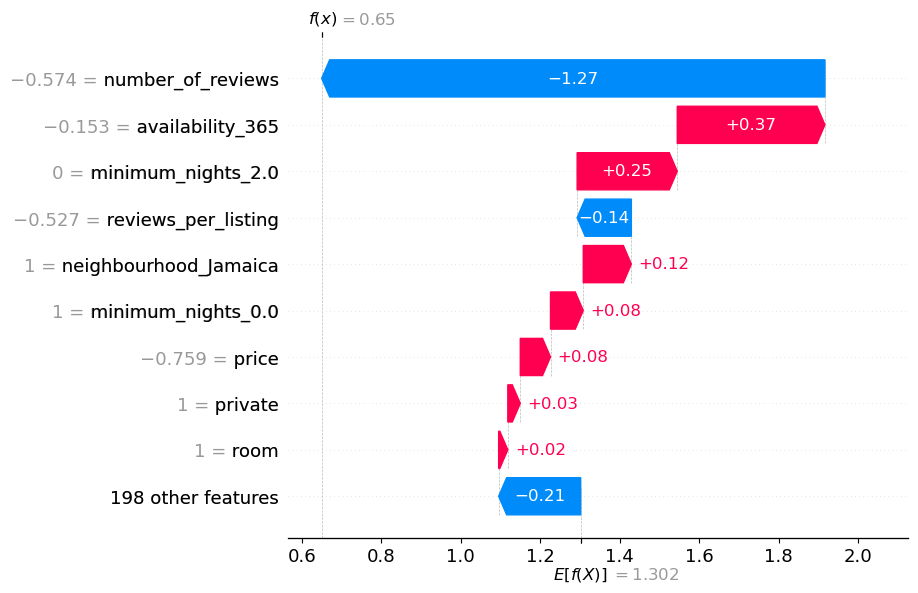

In [44]:
shap.plots.waterfall(test_shap_values[idx1])

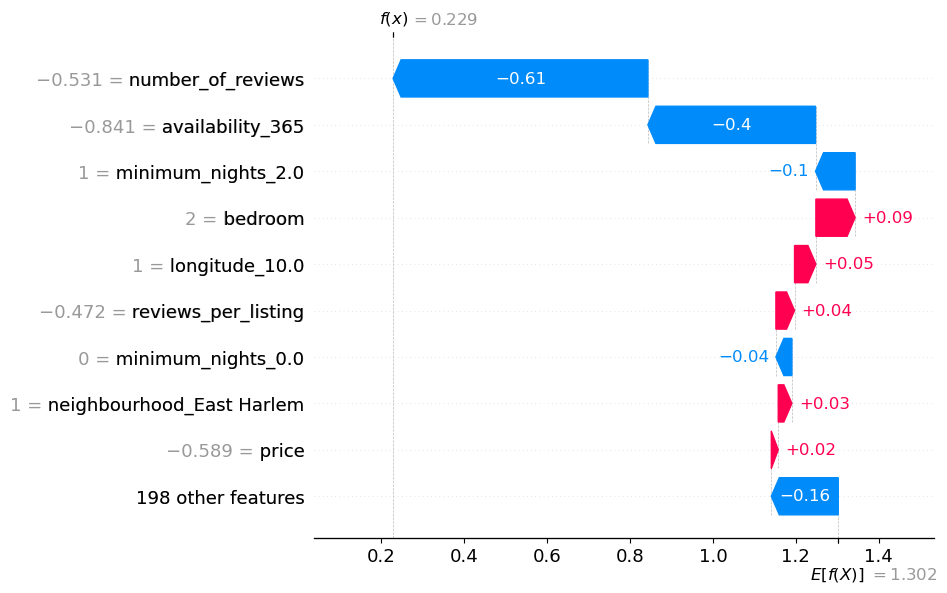

In [45]:
shap.plots.waterfall(test_shap_values[idx2])

Code for the two cells above adapted from: https://github.com/UBC-CS/cpsc330-2024W2/blob/main/lectures/202-203-Giulia-lectures/13_feat-importances.ipynb

Similar to what was seen above in feature importances, `number_of_reviews`, `availability_365`, and `minimum_nights_2.0` are the three most impactful features. Interestingly, however, the shap values for `availability_365` and `minimum_nights_2.0` are positive for the first example and negative for the second. This means that in the first example these features are responsible for an increase in the predicted value whereas they are responsible for lowering the predicted value in the second example. This difference in the sign of the shap value might be due to the difference in the values of these two features in the two examples as well as the interaction of these values with other features.

In addition, after these three features, we can observe that the ordering of features by their absolute shap value is different. This might be because of the way the different values in these features between the two examples interact with other features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

| **Task**                   | **Details**                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| **Models Used**            | Ridge, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor |
| **Mean Cross-Validation Scores**|     Ridge: 0.37, KNN: 0.32, DecisionTreeRegressor: 0.08, RandomForestRegressor: 0.51                  |
| **Mean Feature Selection Cross-Val Scores**      | KNN: 0.35, DecisionTreeRegressor: 0.14, RandomForestRegressor: 0.50 |
| **Hyperparameter Tuning** | Ridge: [alpha = 74.25], KNN: [n_neighbours = 31], DecisionTreeRegressor (with RFECV): [max_depth = 2], RandomForestRegressor: [n_estimators: 105, max_depth: 33] |
| **Tuned Mean Cross-Val Scores** | Ridge: 0.41, KNN: 0.37, DecisionTreeRegressor (with RFECV): 0.30, RandomForestRegressor: 0.51 |
| **Feature Importance**     | number_of_reviews: 0.38, availability_365: 0.12, Rest are < 0.1 |
| **SHAP Insights**          | Top 3 Important Features are the same, but some increase the regression estimate in one example but decrease it in another. Features also have different value rankings between examples. |

Out of all the models evaluated, the best one is the random forest regressor, which achieved a mean cross-validation R2 score of ~0.51 and a test R2 score of ~0.46. Most features (outside the top 10 by importance) had minimal impact on the predicted value, with the most significant one being the total number of reviews. </b>

In the interest of time, we performed feature selection with only two folds for cross-validation. Given a lot more time or with a better device, performing feature selection with a larger number of folds might have resulted in a model with better accuracy. Similarly, tuning more hyper-parameters will take a long time, but would likely yield a better model. In particular, RandomForestRegressor, the model with the highest accuracy showed no imporvements after tuning and as such I would have liked to tune other hyperparameters too. Finally, the training set had to be reduced to 2000 examples as the notebook took 2+ hours to run even with this smaller subset. Training with the entire training set would likely produce a better model.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

One of the biggest takeaways from the supervised machine learning material we have learnt is the concept of generalization. The main goal of a model is to perform well on unseen data, not just on the training set. This shows the importance of the need to balance bias and variance since both can lead to a poor generalizable model.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)